# Regression

In [2]:
## 지도학습이란 : model을 training하고 이미 알려진label(정답)값이 포함된 dataset을 사용해 label을 예측하는 것을 말함.
### 대표적 예시: regression, crassification


## 데이터탐색

In [12]:
import pandas as pd

bike_data = pd.read_csv('C:/Users/Admin/Desktop/success/0513ML/ml-basics-master/data/daily-bike-share.csv')
bike_data.head()
##retals가 종속변수y, 나머지는 다 독립변수 x

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [13]:
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head(32)
##dteday : 데이터가 관찰 된 날짜-이 경우 데이터는 매일 수집되었습니다. 날짜 당 하나의 행이 있습니다.
## datafrme에 dteday를 1부터31까지의 날짜를 나타낸 day라는 새 열을 추가해줘  
##DatetimeIndex: 시계열자료(날짜,시간)생성을 위한 자료형형

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,9
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,10


In [16]:
numeric_features = ['temp','atemp','hum','windspeed']
bike_data[numeric_features+['rentals']].describe()
#이렇게도 행을 이어 붙일수가 있구나, describe()로 df을 보여줌
#특정 열 추출하는 방법

<ipython-input-19-faf59a5db239>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


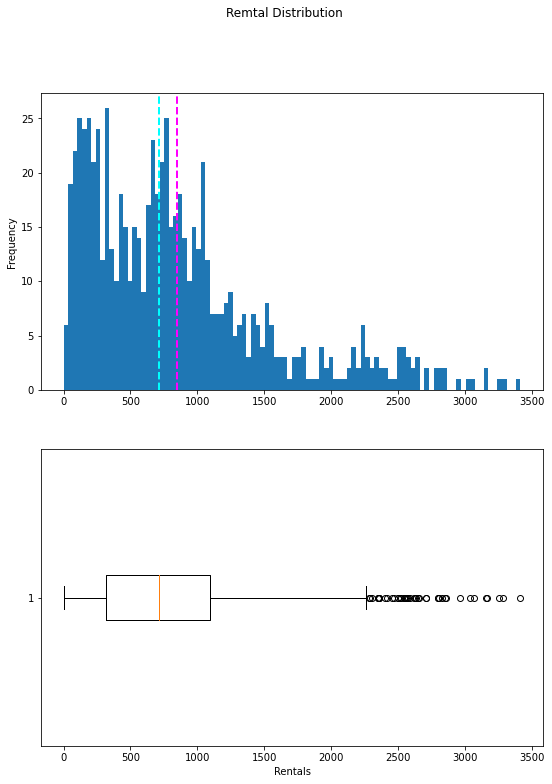

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

#플롯이 쥬피터에 inline으로 표시됨
%matplotlib inline

#레이블 열 가져오기
label = bike_data['rentals']

#2개의 서브플롯(2행,1열) 그림 생성
fig, ax =  plt.subplots(2, 1, figsize = (9,12))

#히스토그램 플로팅 ##bins-> 몇개의 영역으로 쪼갤래? 100개
#set_ylabel-> y 축 설정하기 ##ax ->좌표평면 결정
ax[0].hist(label, bins = 100)
ax[0].set_ylabel('Frequency')

#axvline->지정 위치에 수직 수평선 그려주기 #linewidth->선의 넓이 조정
#ax[0]이라는 액자에 그림을 그릴래
ax[0].axvline(label.mean(), color = 'magenta', linestyle='dashed', linewidth = 2)
ax[0].axvline(label.median(), color = 'cyan', linestyle='dashed', linewidth = 2)

# vert=False 가로축그리기
#결측치가 동그라미 그림으로 나타남inewidth = 2)
ax[0].axvline(label.median(), color = 'cyan', linestyle='dashed', linewidth = 2)

# vert=False 가로축그리기
#동그라미 말고 그냥 길쭉한 애는 뭐하는 애야?
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

# fig.suptitle->그림에 제목 추가
fig.suptitle('Remtal Distribution')

#그림 보여줘
fig.show()

#### 플롯에 따르면 일일 임대 횟수가 0-3400약간 넘음. 그러나 일일 대여 평균은 0-2200건 사이임, 동그라미는 이상치를 뜻함:비정상적으로 높거나 낮은값

In [ ]:
import numpy as np